In [ ]:
!pip install matplotlib  # not contained in the environment

In [22]:
import os
import json
import matplotlib.pyplot as plt
import numpy as np

In [23]:
def make_plots(folder_path, model_name, savefig=False):
    # Initialize data containers
    diversity_data = {}
    intra_list_diversity_data = {}

    # Read and parse each JSON file
    for filename in os.listdir(folder_path):
        if filename.endswith('.json'):
            filepath = os.path.join(folder_path, filename)
            with open(filepath, 'r') as file:
                if "_" in filename:
                    filename = filename.split("_")[-1]
                filename = filename.replace(".json", "")
                data = json.load(file)
                diversity_data[filename] = [data[f'diversity@{k}'] for k in range(1, 6)]
                intra_list_diversity_data[filename] = [data[f'intra_list_diversity@{k}'] for k in range(1, 6)]

    # Generate X axis values (k values)
    k_values = np.arange(1, 6)  # [1, 2, 3, 4, 5]

    # Plot Diversity
    bar_width = 0.18
    plt.figure(figsize=(9, 5))
    for i, (filename, diversity_values) in enumerate(diversity_data.items()):
        plt.bar(k_values + i * bar_width, diversity_values, width=bar_width, label=filename)
    plt.title(f'Diversity@K for Different Prompts with {model_name} Model')
    plt.xlabel('K')
    plt.ylabel('Diversity@K')
    plt.xticks(k_values + bar_width * (len(diversity_data) - 1) / 2, k_values)
    plt.legend()
    plt.grid(False)
    if savefig: plt.savefig(f'{model_name}_div.svg')
    plt.show()

    # Plot Intra-list Diversity
    plt.figure(figsize=(9, 5))
    for i, (filename, intra_list_diversity_values) in enumerate(intra_list_diversity_data.items()):
        plt.bar(k_values + i * bar_width, intra_list_diversity_values, width=bar_width, label=filename)
    plt.title(f'Intra-list Diversity@K for Different Prompts with {model_name} Model')
    plt.xlabel('K')
    plt.ylabel('Intra-list Diversity@K')
    plt.xticks(k_values + bar_width * (len(intra_list_diversity_data) - 1) / 2, k_values)
    plt.legend()
    plt.grid(False)
    if savefig: plt.savefig(f'{model_name}_int.svg')
    plt.show()

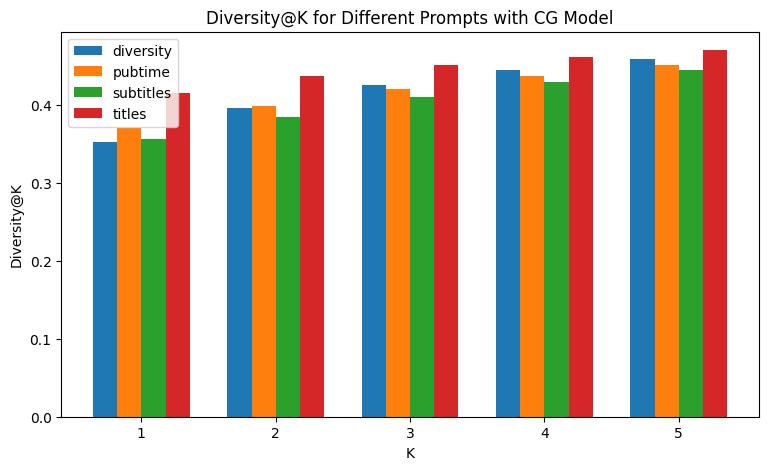

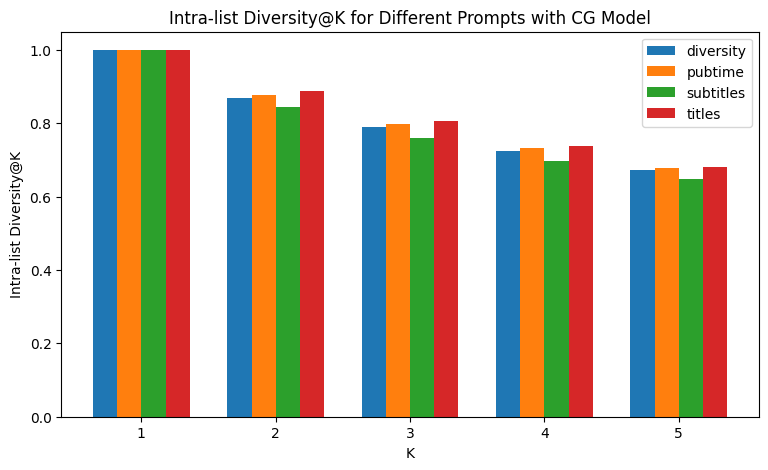

In [24]:
# Folder containing the JSON files
folder_path = '../results/validation/CG/lambda_0.4'
model_name = 'CG'

make_plots(folder_path, model_name)

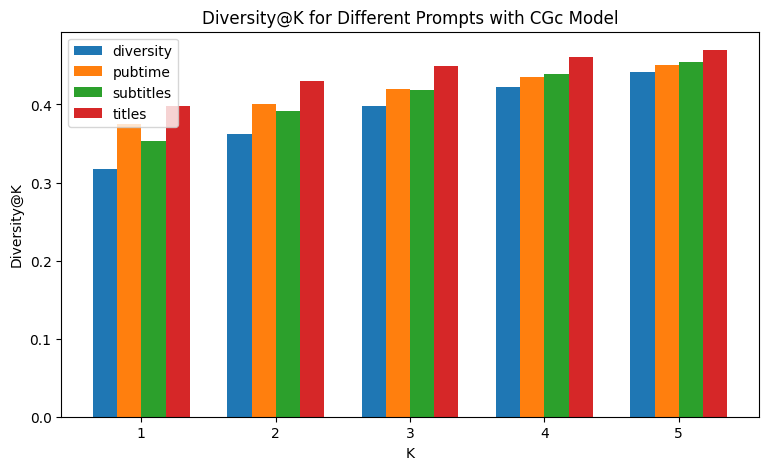

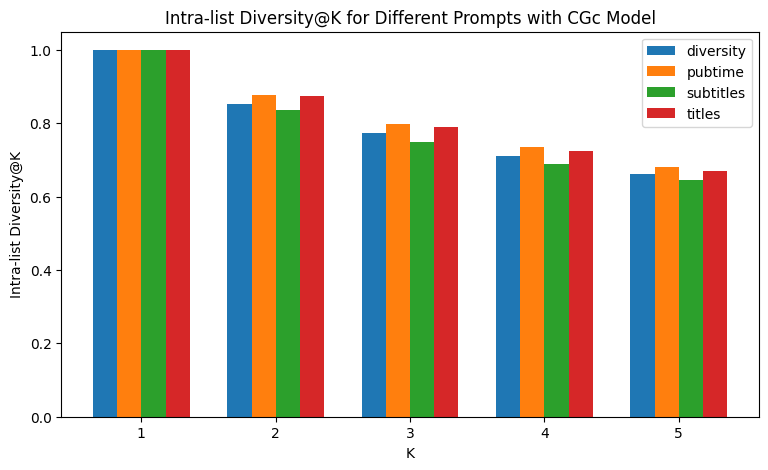

In [25]:
# Folder containing the JSON files
folder_path = '../results/validation/CGc/lambda_0.4'
model_name = 'CGc'

make_plots(folder_path, model_name)

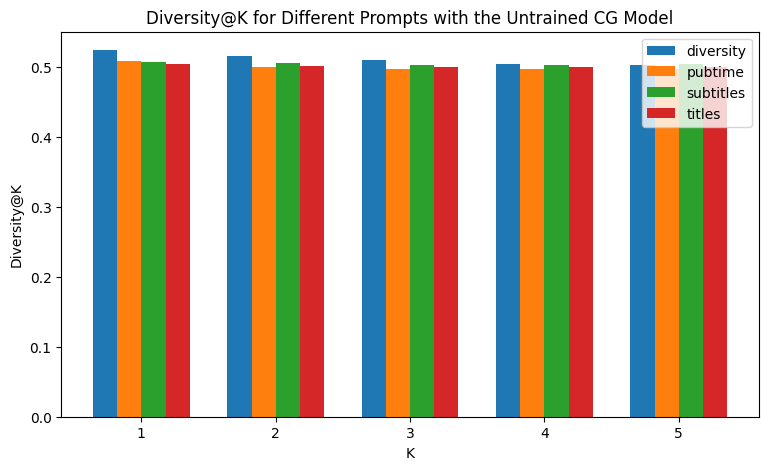

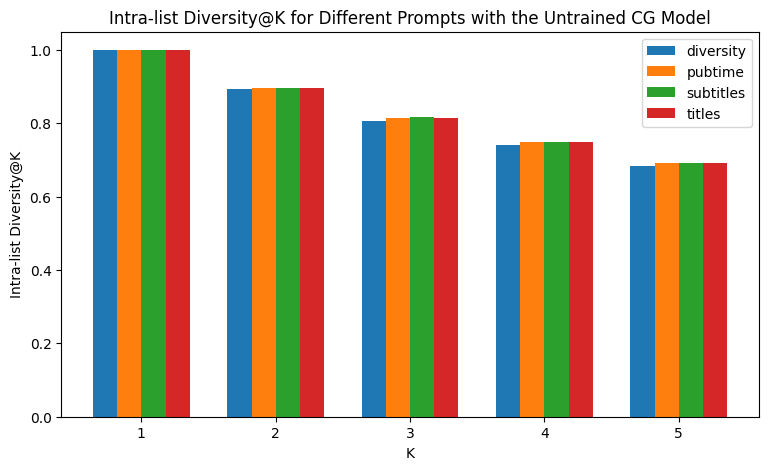

In [26]:
# Folder containing the JSON files
folder_path = '../results/validation/CG_untrained'
model_name = 'the Untrained CG'

make_plots(folder_path, model_name)

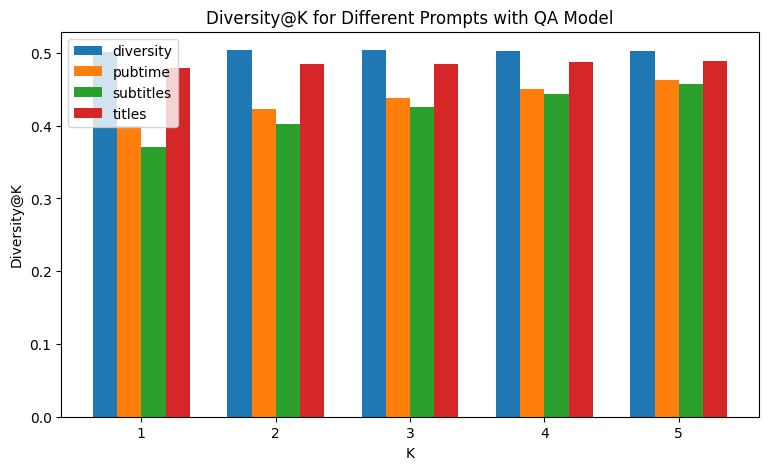

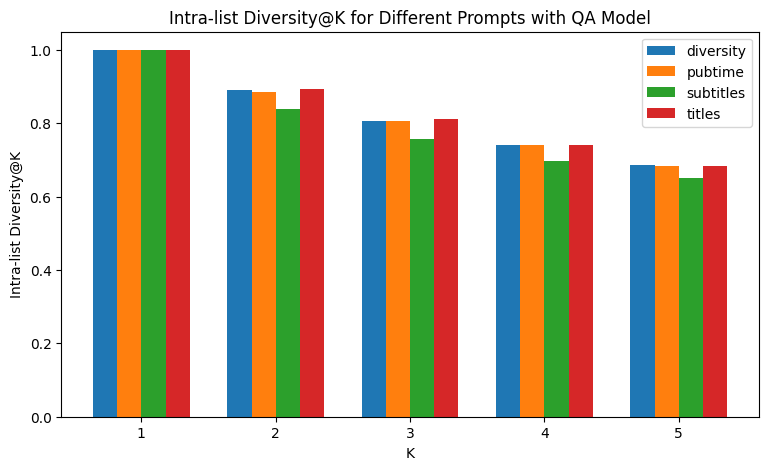

In [27]:
# Folder containing the JSON files
folder_path = '../results/validation/QA/lambda_0.4'
model_name = 'QA'

make_plots(folder_path, model_name)